In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

# enumerate() 를 이용한, 이중 for 문 예제 
 ### 아래의 구문을 이해해보자

In [34]:
rows = [1, 2]
columns = [5, 11, 21]
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):
        print(n_corrections)
        

1
1
1
2
2
2


In [35]:
rows = [1, 2]
columns = [5, 11, 21]
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):
        print(n_divs)
        

5
11
21
5
11
21


In [28]:
rows    = [1, 2]
columns = [5, 11, 21]
for i in enumerate(rows):
    for j in enumerate(columns):
        print(j)

(0, 5)
(1, 11)
(2, 21)
(0, 5)
(1, 11)
(2, 21)


# enumerate() 함수와 zip의 이용 

In [5]:
x = np.linspace(1, 10, 10)

for i, (x_curr, x_next) in enumerate(zip(x[:-1], x[1:])):
    print(i, (x_curr, x_next))

0 (1.0, 2.0)
1 (2.0, 3.0)
2 (3.0, 4.0)
3 (4.0, 5.0)
4 (5.0, 6.0)
5 (6.0, 7.0)
6 (7.0, 8.0)
7 (8.0, 9.0)
8 (9.0, 10.0)


# numpy 행렬을 len을 이용해서 늘리기

In [15]:
y0 = np.linspace(1,10,10)
y = [y0] * len(np.linspace(1,10,10))
y

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])]

In [19]:
def euler_ode(f, y0, x):
    
    def single_step(y, x, h):
        return y + h*f(x, y) #Euler formula Use it as it is
    
    y = [y0] * len(x) #x의 갯수만큼 y0의 값 자체를 늘려준다.(리스트만 만드는 꼴)
    for i, (x_curr, x_next) in enumerate(zip(x[:-1], x[1:])):
        #emuerate는 인덱스와 원소를 동시에 접근하면서 루프를 돌릴 수 있다. 튜플 꼴로 나옴.
        y_curr = y[i]
        dx     = x_next - x_curr
        y[i + 1] = single_step(y_curr, x_curr, dx) 
        #y0는 고정값이니 변하지 않지만 y_0+1 부터는 값이 계속 수정된다. 
        #즉 초기에 돌렸을 때는 0과 y1이 생기고, 그다음은 y[i] = y1이 되면서부터, 그때부터 다시 y[i + 1]의 값을 만든다.
        
        #또한, x의 범위의 간격 (횟수)번 만큼 반복시킨다. 즉 반복이 많아지면, 더욱 세밀하게 잘려지는거고(linspace때문에,) 그 잘린 횟수 만큼의
        #차가 곧, dx 그리고 그 값을 통해 y_n+1을 구해주고,
    return y

def f(x, y):
    return y

x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.plot시에, 그저 또다른 그래프 얹으려면 바로 , 쓰고 쓰면 됨.

Text(0.5, 0, '$x$')

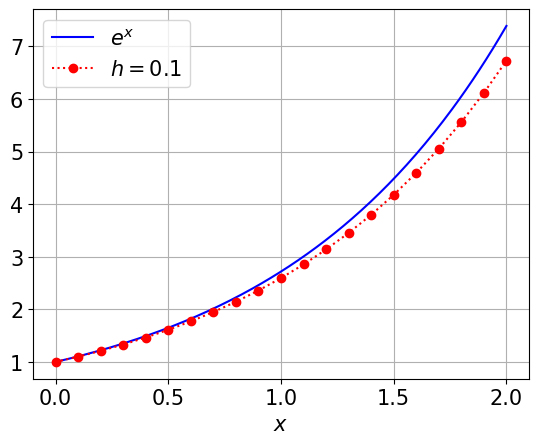

In [22]:
x = np.linspace(0, 2, 21) #오직 간격만이 차이가 있다.
plt.plot(x_true, y_true, "-b", x, euler_ode(f, 1, x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")

로그 Scale로 함수를 그리는 법?

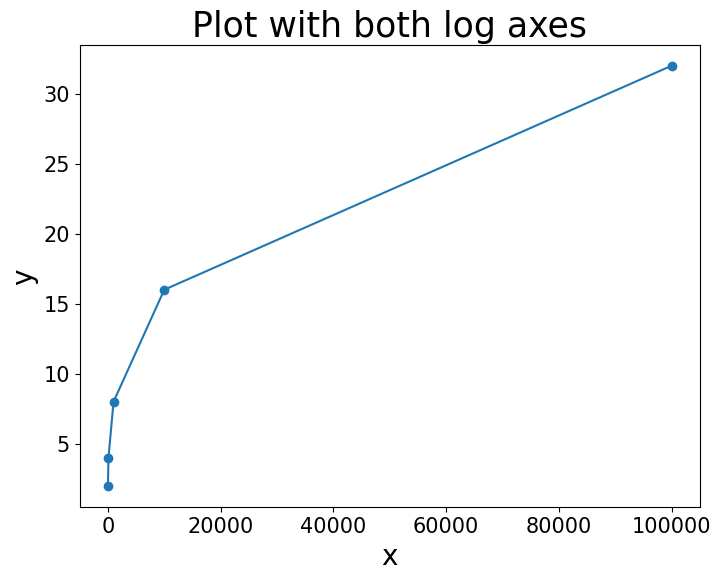

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

x = [10, 100, 1000, 10000, 100000]
y = [2, 4 ,8, 16, 32]

fig = plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, y)
plt.loglog(basex=10,basey=2)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.title("Plot with both log axes",fontsize=25)
plt.show()